Working with images

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Open NIR
mica4 = rasterio.open('C:/Users/Eduardo Q Marques/Documents/My Jobs/Doutorado/Micasense Project/Mica - Python/IMG_0004_4.tif')

C:\Users\Eduardo Q Marques\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


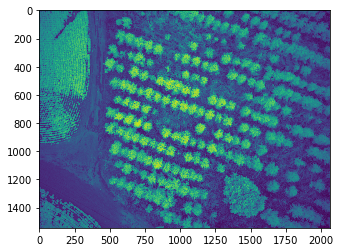

In [3]:
#Plot NIR
show(mica4)

In [4]:
#Open red
mica3 = rasterio.open('C:/Users/Eduardo Q Marques/Documents/My Jobs/Doutorado/Micasense Project/Mica - Python/IMG_0004_3.tif')

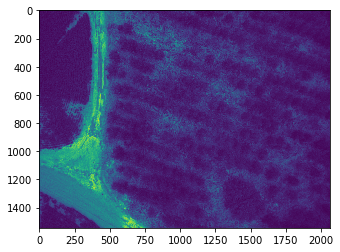

In [5]:
#Plot red
show(mica3)

In [6]:
#Generate nir and red objects as arrays in float64 format
red = mica3.read(1).astype('float64')
nir = mica4.read(1).astype('float64')

In [7]:
#NDVI calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

array([[0.578085  , 0.58274064, 0.58313368, 0.61076406, 0.6481775 ],
       [0.63081395, 0.5645397 , 0.56246962, 0.58536585, 0.6567623 ],
       [0.57195915, 0.61231361, 0.53361946, 0.59141882, 0.60875773],
       [0.60075153, 0.62273161, 0.60095465, 0.58128544, 0.54640109],
       [0.59907407, 0.61545988, 0.59899497, 0.61630695, 0.60571165]])

In [8]:
#Export ndvi image
ndviImage = rasterio.open('C:/Users/Eduardo Q Marques/Documents/My Jobs/Doutorado/Micasense Project/Mica - Python/NDVI.tif','w',driver='Gtiff',
                          width=mica4.width, 
                          height = mica4.height, 
                          count=1, crs=mica4.crs, 
                          transform=mica4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

C:\Users\Eduardo Q Marques\Anaconda3\lib\site-packages\rasterio\__init__.py:225: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  **kwargs)


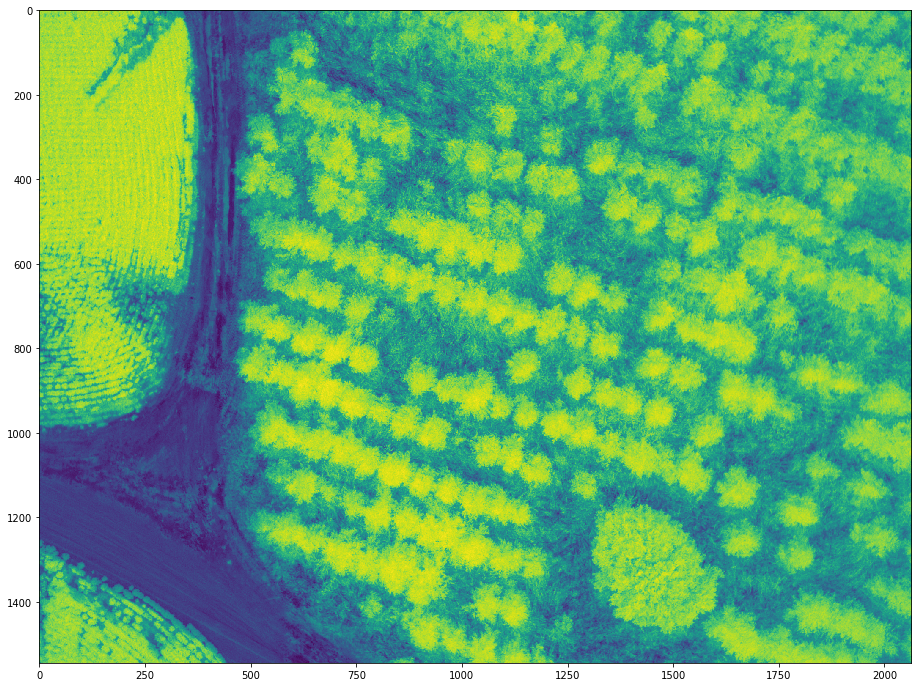

In [9]:
#plot ndvi
ndvi = rasterio.open('C:/Users/Eduardo Q Marques/Documents/My Jobs/Doutorado/Micasense Project/Mica - Python/NDVI.tif')
fig = plt.figure(figsize=(18,12))
show(ndvi)